In [1]:
import numpy as np
from rankboost import RBC, RBD, RBP

### Generate some random data

In [2]:
np.random.seed(1257891) # For reproducibility
x = np.random.randn(100, 10)
y = np.array([(i, j) for i in range(len(x)) for j in range(i+10, len(x))])

### Fit the models

In [3]:
max_iter = 300
results = {}
for alg in [RBC, RBD, RBP]:
    r = alg(max_iter)
    r.fit(x, y)
    cumulative_predictions = r.predict_cumulative(x, y)
    results[r.__class__.__name__] = (
        (cumulative_predictions < 0).mean(0) 
        + 0.5 * (cumulative_predictions==0).mean(0)
    )

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plot the results

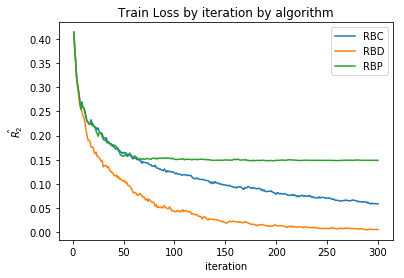

In [5]:
for k, v in results.items():
    plt.plot(np.arange(1, len(v)+1), v, label=k)
plt.legend(loc='best')
plt.title('Train Loss by iteration by algorithm')
plt.xlabel('iteration')
plt.ylabel(r'$\hat{R_2}$');